# **Libraries**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

from imblearn.combine import SMOTEENN
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

# **Data Collection and Pre-Processing**

In [ ]:
# Load dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Check the shape (dimensions) of the dataset
print("1. Dataset Dimensions (Rows, Columns):", data.shape)

# View column names
print("\n2. List of Column Names in the Dataset:\n", data.columns)

# View summary of the dataset
print("\n3. Dataset Summary Information:\n")
print(data.info())

# Check the number of unique values per column
print("\n4. Count of Unique Values per Column:\n")
print(data.nunique())


1. Dataset Dimensions (Rows, Columns): (5110, 12)

2. List of Column Names in the Dataset:
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

3. Dataset Summary Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-nul

In [ ]:
# Check for missing values
print("1. Missing Values Count per Column:")
print(data.isnull().sum())

# Check for duplicate rows
print("\n2. Total Duplicate Rows in the Dataset:", data.duplicated().sum())


1. Missing Values Count per Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

2. Total Duplicate Rows in the Dataset: 0


In [ ]:
# Fill missing BMI values with median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# Verify missing values again
print("\nAfter Imputation - Missing Values Count per Column:")
print(data.isnull().sum())



After Imputation - Missing Values Count per Column:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


/tmp/ipython-input-708792186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [ ]:
# Drop the 'id' column (non-informative)
data.drop('id', axis=1, inplace=True)
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Check class balance in target variable
print(data['stroke'].value_counts())


stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
# Numerical summary
print(data.describe().T)

# Categorical summary
print(data.describe(include='object').T)


                    count        mean        std    min     25%     50%  \
age                5110.0   43.226614  22.612647   0.08  25.000  45.000   
hypertension       5110.0    0.097456   0.296607   0.00   0.000   0.000   
heart_disease      5110.0    0.054012   0.226063   0.00   0.000   0.000   
avg_glucose_level  5110.0  106.147677  45.283560  55.12  77.245  91.885   
bmi                5110.0   28.862035   7.699562  10.30  23.800  28.100   
stroke             5110.0    0.048728   0.215320   0.00   0.000   0.000   

                      75%     max  
age                 61.00   82.00  
hypertension         0.00    1.00  
heart_disease        0.00    1.00  
avg_glucose_level  114.09  271.74  
bmi                 32.80   97.60  
stroke               0.00    1.00  
               count unique           top  freq
gender          5110      3        Female  2994
ever_married    5110      2           Yes  3353
work_type       5110      5       Private  2925
Residence_type  5110      2   

In [ ]:
# Encode categorical columns
label_enc = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])


# **Exploratory Data Analysis**

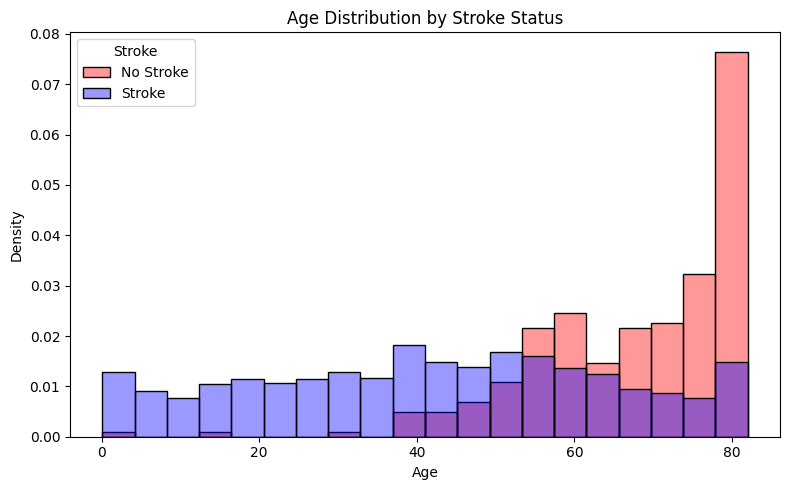

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='age', hue='stroke', stat='density',
             common_norm=False, palette={0:'blue', 1:'red'}, alpha=0.4)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.tight_layout()
plt.show()


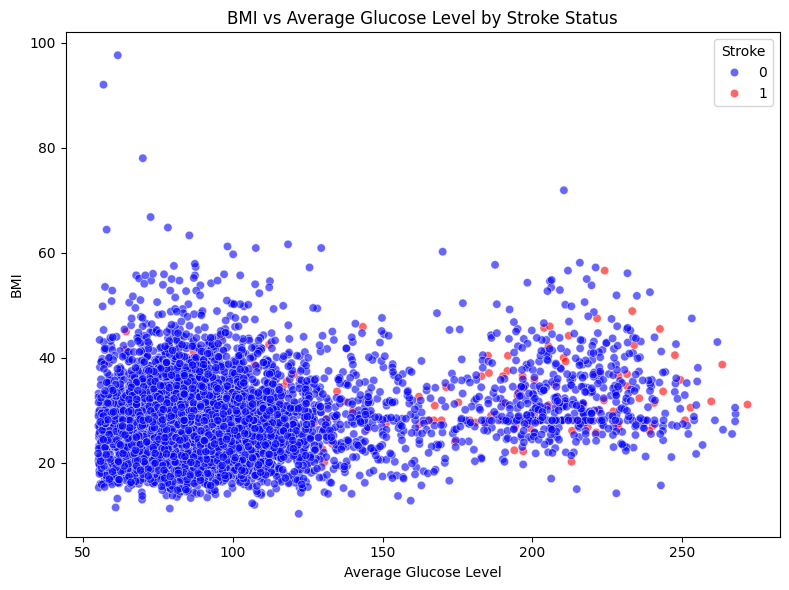

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='avg_glucose_level', y='bmi',
                hue='stroke', palette={0:'blue', 1:'red'}, alpha=0.6)
plt.title('BMI vs Average Glucose Level by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2959691310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_by_smoke.index, y=stroke_by_smoke.values, palette='coolwarm')


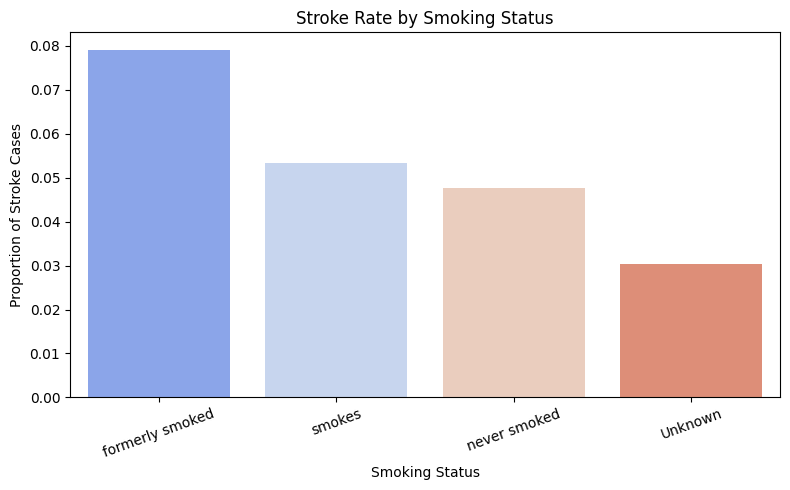

In [ ]:

smoking_map = dict(zip(label_enc.transform(label_enc.classes_), label_enc.classes_))
data['smoking_status_label'] = data['smoking_status'].map(smoking_map)  # ✅ Creates a safe copy for graph

stroke_by_smoke = data.groupby('smoking_status_label')['stroke'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=stroke_by_smoke.index, y=stroke_by_smoke.values, palette='coolwarm')
plt.title('Stroke Rate by Smoking Status')
plt.ylabel('Proportion of Stroke Cases')
plt.xlabel('Smoking Status')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [ ]:

#Droping decoded column before modeling
if 'smoking_status_label' in data.columns:
    data = data.drop(columns=['smoking_status_label'])


# **Modelling and Evaluation**

In [ ]:
#Train Test data
from sklearn.model_selection import train_test_split
# Features and Target
X = data.drop(columns=["stroke"])
y = data["stroke"]

# Train-Test Split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1
)


In [ ]:
#Balancing
from imblearn.combine import SMOTEENN
from collections import Counter

smote_enn = SMOTEENN(random_state=1)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

print("Before balancing:", Counter(y_train))
print("After SMOTE-ENN:", Counter(y_train_res))


Before balancing: Counter({0: 3403, 1: 174})
After SMOTE-ENN: Counter({1: 3166, 0: 2552})


In [ ]:
#Standardizing (LR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


📊 Logistic Regression
Accuracy: 0.735
Precision: 0.114
Recall: 0.653
F1 Score: 0.194
ROC AUC: 0.774


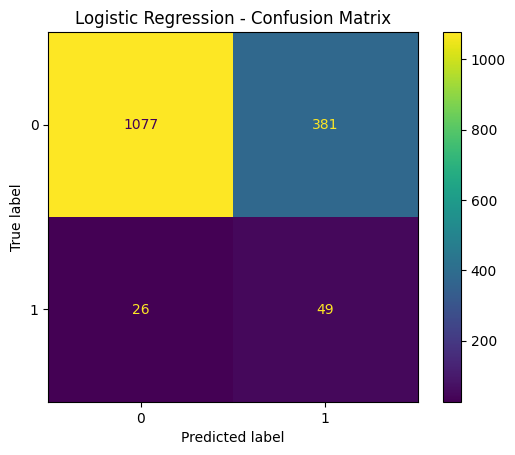

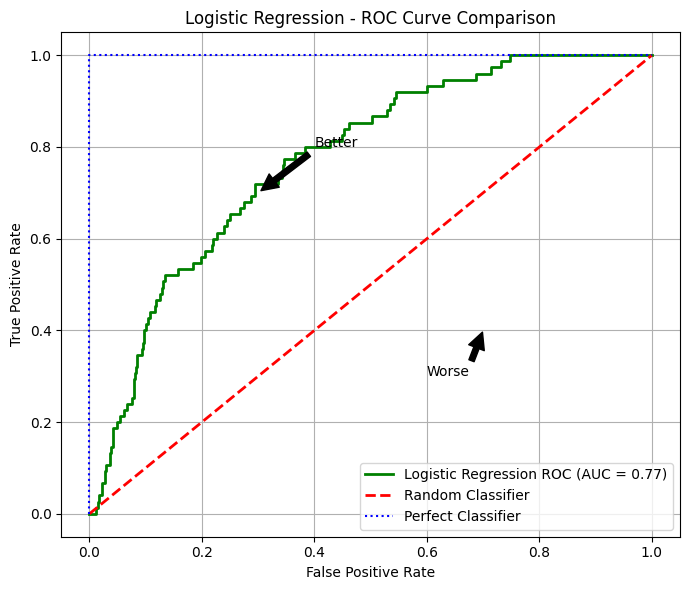

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_res)
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

print("📊 Logistic Regression")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve with Custom Annotations
from sklearn.metrics import roc_curve, auc

# Compute ROC values
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Logistic Regression ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], color='blue', lw=1.5, linestyle=':', label='Perfect Classifier')

# Annotations
plt.annotate('Better', xy=(0.3, 0.7), xytext=(0.4, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
plt.annotate('Worse', xy=(0.7, 0.4), xytext=(0.6, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# Labels and formatting
plt.title("Logistic Regression - ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Random Forest
Accuracy: 0.84
Precision: 0.136
Recall: 0.427
F1 Score: 0.206
ROC AUC: 0.784


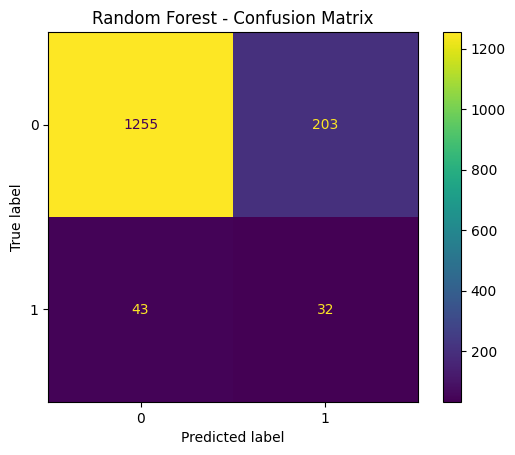

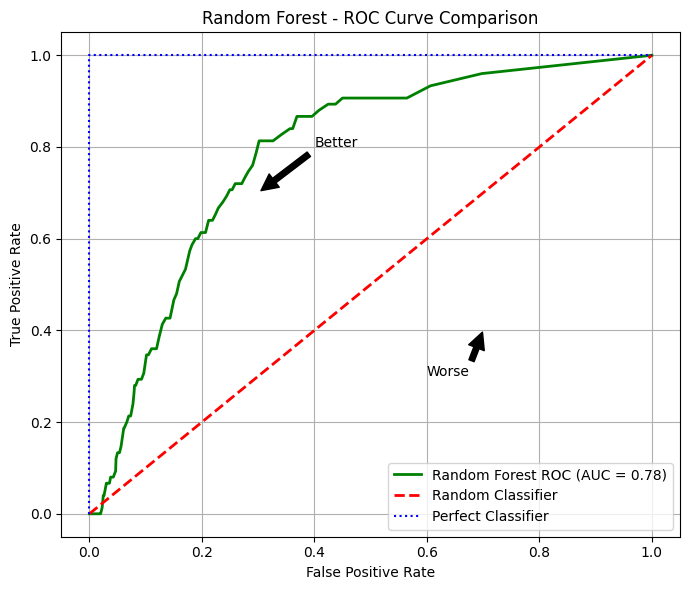

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("📊 Random Forest")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve with Custom Annotations
from sklearn.metrics import roc_curve, auc

# Compute ROC values
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Random Forest ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], color='blue', lw=1.5, linestyle=':', label='Perfect Classifier')

# Annotations
plt.annotate('Better', xy=(0.3, 0.7), xytext=(0.4, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
plt.annotate('Worse', xy=(0.7, 0.4), xytext=(0.6, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# Labels and formatting
plt.title("Random Forest - ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


📊 XGBoost
Accuracy: 0.841
Precision: 0.147
Recall: 0.467
F1 Score: 0.224
ROC AUC: 0.785


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:33:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


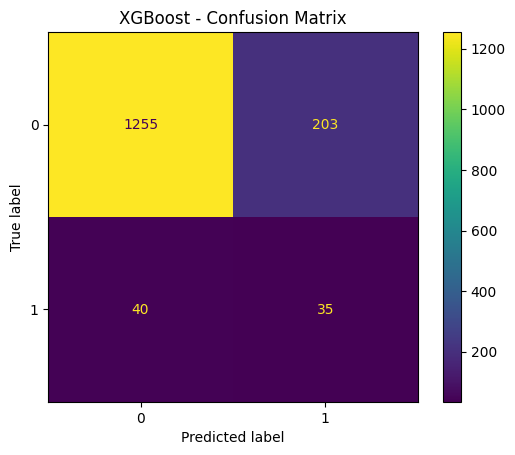

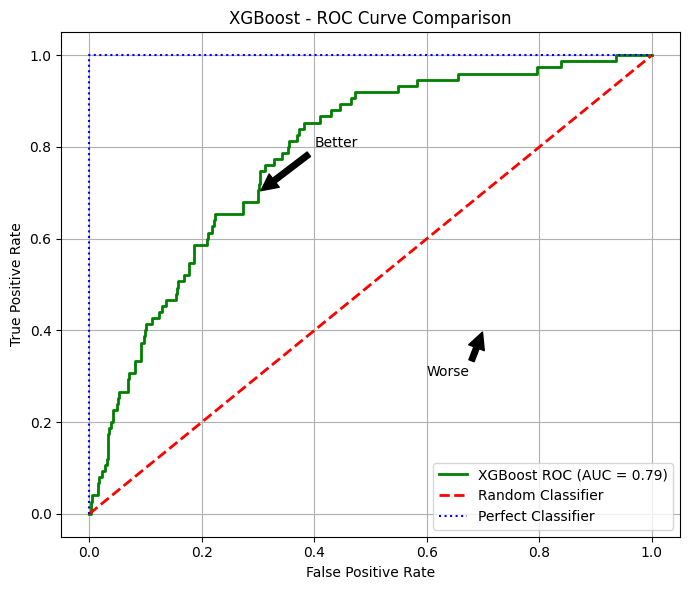

In [ ]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

print("📊 XGBoost")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("XGBoost - Confusion Matrix")
plt.show()

# ROC Curve with Custom Annotations
from sklearn.metrics import roc_curve, auc

# Compute ROC values
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'XGBoost ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], color='blue', lw=1.5, linestyle=':', label='Perfect Classifier')

# Annotations
plt.annotate('Better', xy=(0.3, 0.7), xytext=(0.4, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
plt.annotate('Worse', xy=(0.7, 0.4), xytext=(0.6, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# Labels and formatting
plt.title("XGBoost - ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


📊 CatBoost
Accuracy: 0.817
Precision: 0.127
Recall: 0.467
F1 Score: 0.2
ROC AUC: 0.784


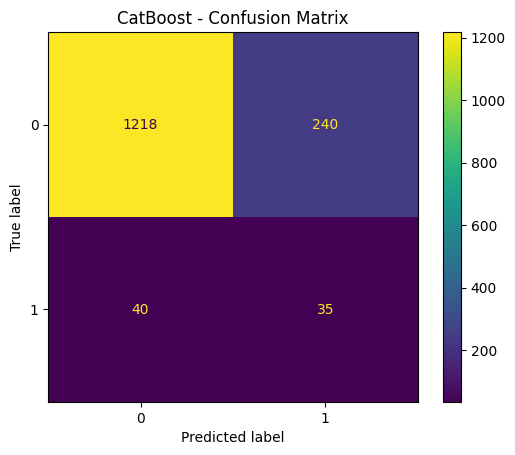

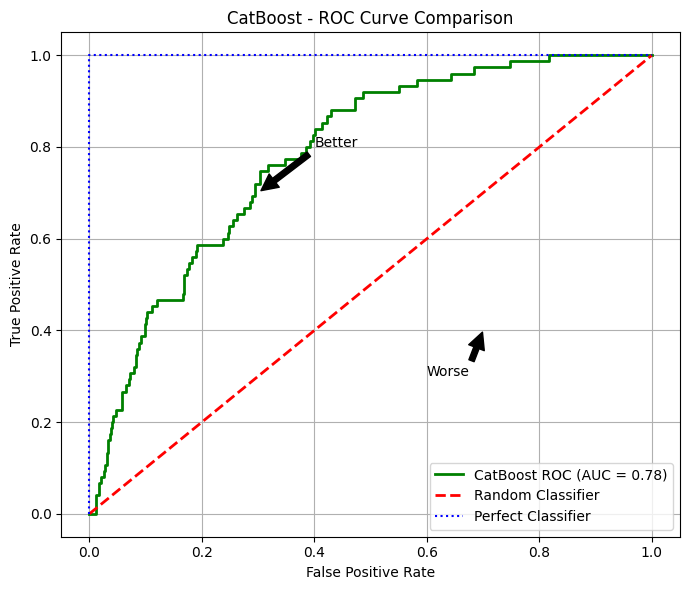

In [ ]:
# CatBoost
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train_res, y_train_res)
y_pred = cat.predict(X_test)
y_proba = cat.predict_proba(X_test)[:, 1]

print("📊 CatBoost")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("CatBoost - Confusion Matrix")
plt.show()

# ROC Curve with Custom Annotations and Reference Lines
from sklearn.metrics import roc_curve, auc

# Compute ROC values
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'CatBoost ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], color='blue', lw=1.5, linestyle=':', label='Perfect Classifier')

# Annotations
plt.annotate('Better', xy=(0.3, 0.7), xytext=(0.4, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
plt.annotate('Worse', xy=(0.7, 0.4), xytext=(0.6, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# Labels, Title, Legend
plt.title("CatBoost - ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


[LightGBM] [Info] Number of positive: 3166, number of negative: 2552
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 5718, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553690 -> initscore=0.215592
[LightGBM] [Info] Start training from score 0.215592
📊 LightGBM
Accuracy: 0.834
Precision: 0.143
Recall: 0.48
F1 Score: 0.221
ROC AUC: 0.789


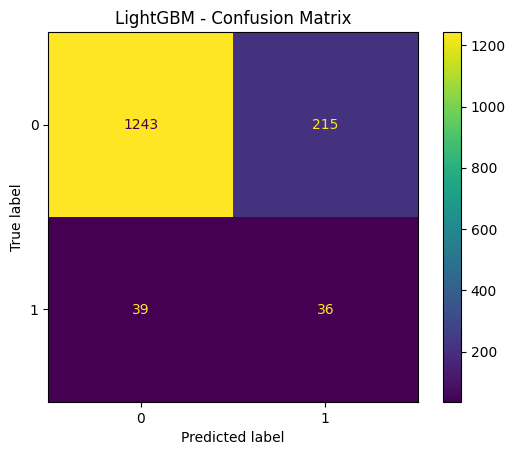

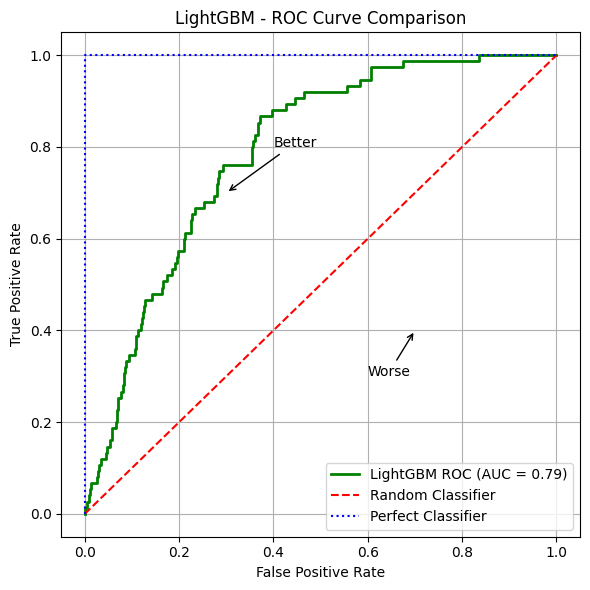

In [ ]:
# LightGBM
from sklearn.metrics import roc_curve, auc

lgb = LGBMClassifier()
lgb.fit(X_train_res, y_train_res)
y_pred = lgb.predict(X_test)
y_proba = lgb.predict_proba(X_test)[:, 1]

print("📊 LightGBM")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("LightGBM - Confusion Matrix")
plt.show()

# Stylized ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='green', lw=2, label='LightGBM ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], color='blue', linestyle=':', label='Perfect Classifier')

plt.annotate('Better', xy=(0.3, 0.7), xytext=(0.4, 0.8), arrowprops=dict(arrowstyle='->'))
plt.annotate('Worse', xy=(0.7, 0.4), xytext=(0.6, 0.3), arrowprops=dict(arrowstyle='->'))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("LightGBM - ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Results**

In [ ]:
# Collecting model names and their evaluation metrics
model_results = []

def evaluate_model(name, y_true, y_pred, y_proba):
    model_results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_true, y_pred), 3),
        "Precision": round(precision_score(y_true, y_pred), 3),
        "Recall": round(recall_score(y_true, y_pred), 3),
        "ROC AUC": round(roc_auc_score(y_true, y_proba), 3)
    })

# Storing results
evaluate_model("Logistic Regression", y_test, lr.predict(X_test_scaled), lr.predict_proba(X_test_scaled)[:, 1])
evaluate_model("Random Forest", y_test, rf.predict(X_test), rf.predict_proba(X_test)[:, 1])
evaluate_model("XGBoost", y_test, xgb.predict(X_test), xgb.predict_proba(X_test)[:, 1])
evaluate_model("LightGBM", y_test, lgb.predict(X_test), lgb.predict_proba(X_test)[:, 1])
evaluate_model("CatBoost", y_test, cat.predict(X_test), cat.predict_proba(X_test)[:, 1])

# Creating comparison DataFrame
comparison_df = pd.DataFrame(model_results)
display(comparison_df.sort_values(by="ROC AUC", ascending=False))


,Model,Accuracy,Precision,Recall,ROC AUC
3,LightGBM,0.834,0.143,0.480,0.789
2,XGBoost,0.841,0.147,0.467,0.785
1,Random Forest,0.840,0.136,0.427,0.784
4,CatBoost,0.817,0.127,0.467,0.784
0,Logistic Regression,0.735,0.114,0.653,0.774


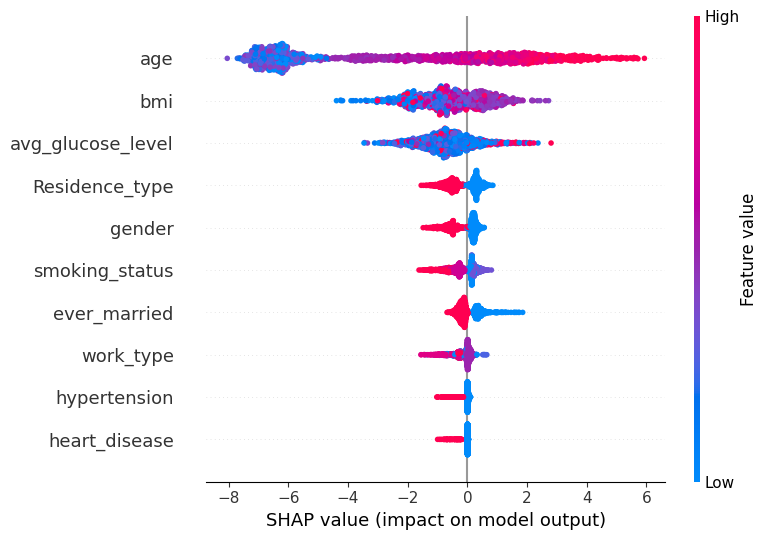

In [ ]:
import shap

# Choosing the best model based on comparison
best_model = lgb

# SHAP for CatBoost
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
